### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light_mid_nodense"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.375
ma1_Shape2 = fn.input()[0] > 0.625
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.375) & (fn.input()[0] <= 0.625)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


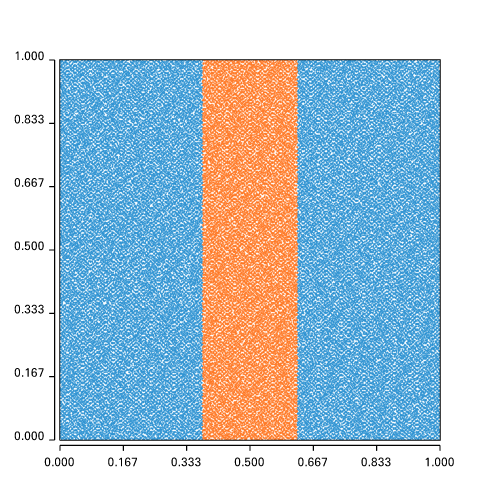

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  1.


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 1.

In [7]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [8]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002822 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32890e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.003714 secs / 7 its
  Pressure Solve:         = 0.1043 secs / 27 its
  Final V Solve:          = 0.003489 secs / 7 its

  Total BSSCR Linear solve time: 0.127432 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.282293e-01 (secs)
Time Integration
	2nd order:     

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911156 [min] / 0.0911156 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.962065e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-03 08:13:31)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003004 seconds

SROpGenerator_SimpleFinestLevel: time = 2.09127e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002257 secs 
  RHS V Solve:            = 0.01011 secs

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003009 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19869e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001294 secs 
  RHS V Solve:            = 0.003968 secs / 7 its
  Pressure Solve:         = 0.162 secs / 27 its
  Final V Solve:          = 0.01352 secs / 7 its

  Total BSSCR Linear solve time: 0.195035 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.957594e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0865 [min] /    0.0865 [max] (secs)
Time Integration - 0.0865647 [min] / 0.0865647 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.663573e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-03 08:13:51)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002422 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27419e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001366 secs 
  RHS V Solve:            = 0.00387 secs / 7 its
  Pressure Solve:         = 0.1081 secs / 27 its
  Final V Solve:          = 0.003523 secs / 7 its

  Total BSSCR Linear solve time: 0.130103 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.305460e-01 (secs)
Time Integration
	2nd order:                 RK8HLS

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.1174 [min] /    0.1174 [max] (secs)
Time Integration - 0.11755 [min] / 0.11755 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.731659e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-03 08:13:58)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002771 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36689e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001464 secs 
  RHS V Solve:            = 0.004303 secs / 7

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004553 seconds

SROpGenerator_SimpleFinestLevel: time = 2.95086e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003305 secs 
  RHS V Solve:            = 0.01032 secs / 7 its
  Pressure Solve:         = 0.2398 secs / 27 its
  Final V Solve:          = 0.006501 secs / 7 its

  Total BSSCR Linear solve time: 0.283045 seconds

Linear solver (HDROLEW7__system-execute), solution time 2.835125e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869356 [min] / 0.0869356 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.844828e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-03 08:14:20)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002824 seconds

SROpGenerator_SimpleFinestLevel: time = 1.57349e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001733 secs 
  RHS V Solve:            = 0.004195 secs / 7 its
  Pressure Solve:         = 0.111 secs / 27 its
  Final V Solve:          = 0.003855 secs / 7 its

  Total BSSCR Linear solve time: 0.137865 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.383210e-01 (secs)
Time Integration
	2nd order:                 RK8HLS

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0876 [min] /    0.0876 [max] (secs)
Time Integration - 0.08767 [min] / 0.08767 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.621317e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-03 08:14:28)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39885e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001502 secs 
  RHS V Solve:            = 0.003939 secs / 7

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003962 seconds

SROpGenerator_SimpleFinestLevel: time = 2.51138e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002701 secs 
  RHS V Solve:            = 0.01044 secs / 7 its
  Pressure Solve:         = 0.1594 secs / 27 its
  Final V Solve:          = 0.005449 secs / 7 its

  Total BSSCR Linear solve time: 0.198049 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.983939e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0884 [min] /    0.0884 [max] (secs)
Time Integration - 0.0883948 [min] / 0.0883948 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.895627e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-03 08:14:45)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002843 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43378e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.005042 secs / 7 its
  Pressure Solve:         = 0.1092 secs / 27 its
  Final V Solve:          = 0.003719 secs / 7 its

  Total BSSCR Linear solve time: 0.133745 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.340488e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0910199 [min] / 0.0910199 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.841660e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-03 08:14:51)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002792 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45647e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001563 secs 
  RHS V Solve:            = 0.00409 secs 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002832 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38748e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.003886 secs / 7 its
  Pressure Solve:         = 0.1092 secs / 27 its
  Final V Solve:          = 0.004403 secs / 7 its

  Total BSSCR Linear solve time: 0.132848 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.331567e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909214 [min] / 0.0909214 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.783211e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-03 08:15:09)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002746 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48706e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001613 secs 
  RHS V Solve:            = 0.006379 secs / 7 its
  Pressure Solve:         = 0.1061 secs / 27 its
  Final V Solve:          = 0.003757 secs / 7 its

  Total BSSCR Linear solve time: 0.133064 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.333817e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0872 [min] /    0.0872 [max] (secs)
Time Integration - 0.0872301 [min] / 0.0872301 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.868318e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-03 08:15:15)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002710 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37240e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.003874 secs 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002837 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35551e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.00404 secs / 7 its
  Pressure Solve:         = 0.1074 secs / 27 its
  Final V Solve:          = 0.003574 secs / 7 its

  Total BSSCR Linear solve time: 0.130019 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.303322e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0826921 [min] / 0.0826921 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.843171e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-03 08:15:32)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002612 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35064e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001454 secs 
  RHS V Solve:            = 0.004622 secs / 7 its
  Pressure Solve:         = 0.1074 secs / 27 its
  Final V Solve:          = 0.003708 secs / 7 its

  Total BSSCR Linear solve time: 0.131352 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.316910e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0832976 [min] / 0.0832976 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.713490e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-03 08:15:38)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002730 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37792e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001473 secs 
  RHS V Solve:            = 0.004117 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002810 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35502e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001455 secs 
  RHS V Solve:            = 0.003901 secs / 7 its
  Pressure Solve:         = 0.1106 secs / 27 its
  Final V Solve:          = 0.004756 secs / 7 its

  Total BSSCR Linear solve time: 0.134651 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.350047e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0878 [min] /    0.0878 [max] (secs)
Time Integration - 0.0878398 [min] / 0.0878398 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.759694e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-03 08:15:56)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002797 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38410e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.004119 secs / 7 its
  Pressure Solve:         = 0.1086 secs / 27 its
  Final V Solve:          = 0.004091 secs / 7 its

  Total BSSCR Linear solve time: 0.131822 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.321761e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0825 [min] /    0.0825 [max] (secs)
Time Integration - 0.0825699 [min] / 0.0825699 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.662366e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-03 08:16:02)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38315e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001486 secs 
  RHS V Solve:            = 0.004194 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003019 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41009e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.004064 secs / 7 its
  Pressure Solve:         = 0.1056 secs / 27 its
  Final V Solve:          = 0.003695 secs / 7 its

  Total BSSCR Linear solve time: 0.128961 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.295689e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0879362 [min] / 0.0879362 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.190939e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-03 08:16:19)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36091e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.003831 secs / 7 its
  Pressure Solve:         = 0.1079 secs / 27 its
  Final V Solve:          = 0.003852 secs / 7 its

  Total BSSCR Linear solve time: 0.130712 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.310459e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844405 [min] / 0.0844405 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.893140e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-03 08:16:25)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002579 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26677e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001369 secs 
  RHS V Solve:            = 0.003714 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002777 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40370e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001511 secs 
  RHS V Solve:            = 0.003963 secs / 7 its
  Pressure Solve:         = 0.1094 secs / 27 its
  Final V Solve:          = 0.003706 secs / 7 its

  Total BSSCR Linear solve time: 0.132453 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.328210e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.0848533 [min] / 0.0848533 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.721103e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-03 08:16:42)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002856 seconds

SROpGenerator_SimpleFinestLevel: time = 1.57564e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001719 secs 
  RHS V Solve:            = 0.005101 secs / 7 its
  Pressure Solve:         = 0.1087 secs / 27 its
  Final V Solve:          = 0.003739 secs / 7 its

  Total BSSCR Linear solve time: 0.133676 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.340508e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836237 [min] / 0.0836237 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.639370e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-03 08:16:48)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002817 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47880e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001599 secs 
  RHS V Solve:            = 0.003912 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002710 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41894e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.003851 secs / 7 its
  Pressure Solve:         = 0.1105 secs / 27 its
  Final V Solve:          = 0.003873 secs / 7 its

  Total BSSCR Linear solve time: 0.133535 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.338789e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907088 [min] / 0.0907088 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.748991e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-03 08:17:06)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002817 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48802e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.005302 secs / 7 its
  Pressure Solve:         = 0.1093 secs / 27 its
  Final V Solve:          = 0.003711 secs / 7 its

  Total BSSCR Linear solve time: 0.133980 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.343221e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0884 [min] /    0.0884 [max] (secs)
Time Integration - 0.0885134 [min] / 0.0885134 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.423151e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-03 08:17:12)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44595e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001607 secs 
  RHS V Solve:            = 0.004371 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005054 seconds

SROpGenerator_SimpleFinestLevel: time = 2.71559e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002875 secs 
  RHS V Solve:            = 0.004376 secs / 7 its
  Pressure Solve:         = 0.106 secs / 27 its
  Final V Solve:          = 0.003783 secs / 7 its

  Total BSSCR Linear solve time: 0.136493 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.369721e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0828518 [min] / 0.0828518 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.577783e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-03 08:17:29)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002718 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44162e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.003933 secs / 7 its
  Pressure Solve:         = 0.1058 secs / 27 its
  Final V Solve:          = 0.005246 secs / 7 its

  Total BSSCR Linear solve time: 0.130762 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.311089e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0882 [min] /    0.0882 [max] (secs)
Time Integration - 0.0882849 [min] / 0.0882849 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.829775e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-03 08:17:36)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38870e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.003944 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002989 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39917e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.004589 secs / 7 its
  Pressure Solve:         = 0.1048 secs / 27 its
  Final V Solve:          = 0.00383 secs / 7 its

  Total BSSCR Linear solve time: 0.131042 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.314172e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852481 [min] / 0.0852481 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.943180e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-03 08:17:53)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47074e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001577 secs 
  RHS V Solve:            = 0.005784 secs / 7 its
  Pressure Solve:         = 0.1051 secs / 27 its
  Final V Solve:          = 0.003688 secs / 7 its

  Total BSSCR Linear solve time: 0.130666 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.310515e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0883 [min] /    0.0883 [max] (secs)
Time Integration - 0.0883706 [min] / 0.0883706 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.779906e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-03 08:17:59)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002978 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41713e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.004037 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002904 seconds

SROpGenerator_SimpleFinestLevel: time = 1.73765e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001876 secs 
  RHS V Solve:            = 0.003891 secs / 7 its
  Pressure Solve:         = 0.1066 secs / 27 its
  Final V Solve:          = 0.003945 secs / 7 its

  Total BSSCR Linear solve time: 0.130466 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.308240e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.083008 [min] / 0.083008 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.632752e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-03 08:18:16)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002696 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37054e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.003938 secs / 7 its
  Pressure Solve:         = 0.1079 secs / 27 its
  Final V Solve:          = 0.003954 secs / 7 its

  Total BSSCR Linear solve time: 0.130737 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.311218e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0900 [min] /    0.0900 [max] (secs)
Time Integration - 0.09006 [min] / 0.09006 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.806635e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-03 08:18:22)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002877 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37310e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001476 secs 
  RHS V Solve:            = 0.003955 secs / 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002707 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46406e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001585 secs 
  RHS V Solve:            = 0.004314 secs / 7 its
  Pressure Solve:         = 0.1076 secs / 27 its
  Final V Solve:          = 0.0044 secs / 7 its

  Total BSSCR Linear solve time: 0.132926 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.332891e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0835869 [min] / 0.0835869 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.707080e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-03 08:18:39)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002752 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43525e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.004866 secs / 7 its
  Pressure Solve:         = 0.1076 secs / 27 its
  Final V Solve:          = 0.003775 secs / 7 its

  Total BSSCR Linear solve time: 0.132579 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.330067e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0835 [min] /    0.0835 [max] (secs)
Time Integration - 0.0835364 [min] / 0.0835364 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.747169e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-03 08:18:46)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002803 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40669e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.003908 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002802 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48704e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001605 secs 
  RHS V Solve:            = 0.00389 secs / 7 its
  Pressure Solve:         = 0.1059 secs / 27 its
  Final V Solve:          = 0.003726 secs / 7 its

  Total BSSCR Linear solve time: 0.129023 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.293818e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830278 [min] / 0.0830278 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.942172e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-03 08:19:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002943 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38031e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001498 secs 
  RHS V Solve:            = 0.004144 secs / 7 its
  Pressure Solve:         = 0.1047 secs / 27 its
  Final V Solve:          = 0.003648 secs / 7 its

  Total BSSCR Linear solve time: 0.129229 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.297747e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831924 [min] / 0.0831924 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.209135e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-03 08:19:09)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002653 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32255e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.004075 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003230 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45608e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.003889 secs / 7 its
  Pressure Solve:         = 0.1068 secs / 27 its
  Final V Solve:          = 0.003615 secs / 7 its

  Total BSSCR Linear solve time: 0.130385 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.307589e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0828644 [min] / 0.0828644 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.963129e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-03 08:19:26)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002813 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44846e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001573 secs 
  RHS V Solve:            = 0.003907 secs / 7 its
  Pressure Solve:         = 0.108 secs / 27 its
  Final V Solve:          = 0.003805 secs / 7 its

  Total BSSCR Linear solve time: 0.131281 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.316487e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0890 [min] /    0.0890 [max] (secs)
Time Integration - 0.0890453 [min] / 0.0890453 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.939652e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-03 08:19:33)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.56647e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001671 secs 
  RHS V Solve:            = 0.003873 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002860 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36601e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.004623 secs / 7 its
  Pressure Solve:         = 0.1078 secs / 27 its
  Final V Solve:          = 0.004106 secs / 7 its

  Total BSSCR Linear solve time: 0.133298 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.336653e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903071 [min] / 0.0903071 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.892370e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-03 08:19:50)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002974 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47347e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001578 secs 
  RHS V Solve:            = 0.004268 secs / 7 its
  Pressure Solve:         = 0.1081 secs / 27 its
  Final V Solve:          = 0.003853 secs / 7 its

  Total BSSCR Linear solve time: 0.132035 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.324269e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833965 [min] / 0.0833965 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.736921e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-03 08:19:56)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002860 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43175e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.004075 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002893 seconds

SROpGenerator_SimpleFinestLevel: time = 1.66753e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001856 secs 
  RHS V Solve:            = 0.004072 secs / 7 its
  Pressure Solve:         = 0.1084 secs / 27 its
  Final V Solve:          = 0.004211 secs / 7 its

  Total BSSCR Linear solve time: 0.133110 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.334991e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0889054 [min] / 0.0889054 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.788027e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-03 08:20:13)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002886 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41954e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001546 secs 
  RHS V Solve:            = 0.003813 secs / 7 its
  Pressure Solve:         = 0.1075 secs / 27 its
  Final V Solve:          = 0.00362 secs / 7 its

  Total BSSCR Linear solve time: 0.130756 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.312794e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887423 [min] / 0.0887423 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.003106e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-03 08:20:20)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002760 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46666e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001598 secs 
  RHS V Solve:            = 0.003985 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002846 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42548e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.004196 secs / 7 its
  Pressure Solve:         = 0.1097 secs / 27 its
  Final V Solve:          = 0.003858 secs / 7 its

  Total BSSCR Linear solve time: 0.133323 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.340531e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887594 [min] / 0.0887594 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.401435e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-03 08:20:37)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002899 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38253e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001503 secs 
  RHS V Solve:            = 0.004644 secs / 7 its
  Pressure Solve:         = 0.1089 secs / 27 its
  Final V Solve:          = 0.003985 secs / 7 its

  Total BSSCR Linear solve time: 0.133575 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.339924e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0878 [min] /    0.0878 [max] (secs)
Time Integration - 0.0878879 [min] / 0.0878879 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.751563e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-03 08:20:43)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002845 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36983e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001485 secs 
  RHS V Solve:            = 0.003925 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002883 seconds

SROpGenerator_SimpleFinestLevel: time = 1.80853e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001964 secs 
  RHS V Solve:            = 0.004176 secs / 7 its
  Pressure Solve:         = 0.1079 secs / 27 its
  Final V Solve:          = 0.00392 secs / 7 its

  Total BSSCR Linear solve time: 0.132404 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.328316e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0891 [min] /    0.0891 [max] (secs)
Time Integration - 0.0891265 [min] / 0.0891265 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.355000e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-03 08:21:00)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002815 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43390e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.003813 secs / 7 its
  Pressure Solve:         = 0.1059 secs / 27 its
  Final V Solve:          = 0.003592 secs / 7 its

  Total BSSCR Linear solve time: 0.128615 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.290361e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0899 [min] /    0.0899 [max] (secs)
Time Integration - 0.0899334 [min] / 0.0899334 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.866774e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-03 08:21:07)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002863 seconds

SROpGenerator_SimpleFinestLevel: time = 1.58112e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001721 secs 
  RHS V Solve:            = 0.004019 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002865 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38469e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001488 secs 
  RHS V Solve:            = 0.004048 secs / 7 its
  Pressure Solve:         = 0.1087 secs / 27 its
  Final V Solve:          = 0.003958 secs / 7 its

  Total BSSCR Linear solve time: 0.132908 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.333321e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.1078 [min] /    0.1078 [max] (secs)
Time Integration - 0.107874 [min] / 0.107874 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 3.969342e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-03 08:21:24)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002963 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44767e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001557 secs 
  RHS V Solve:            = 0.005322 secs / 7 its
  Pressure Solve:         = 0.1091 secs / 27 its
  Final V Solve:          = 0.003666 secs / 7 its

  Total BSSCR Linear solve time: 0.134621 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.350705e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912078 [min] / 0.0912078 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.912165e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-03 08:21:30)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002826 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35920e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.003946 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002887 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45125e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001564 secs 
  RHS V Solve:            = 0.004283 secs / 7 its
  Pressure Solve:         = 0.1211 secs / 27 its
  Final V Solve:          = 0.004457 secs / 7 its

  Total BSSCR Linear solve time: 0.145770 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.462019e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.1038 [min] /    0.1038 [max] (secs)
Time Integration - 0.103854 [min] / 0.103854 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 4.014970e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-03 08:21:47)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002224 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10267e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001197 secs 
  RHS V Solve:            = 0.003441 secs / 7 its
  Pressure Solve:         = 0.08998 secs / 27 its
  Final V Solve:          = 0.003408 secs / 7 its

  Total BSSCR Linear solve time: 0.109407 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.097768e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0858 [min] /    0.0858 [max] (secs)
Time Integration - 0.0858032 [min] / 0.0858032 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.762373e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-03 08:21:52)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002232 seconds

SROpGenerator_SimpleFinestLevel: time = 1.07668e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001157 secs 
  RHS V Solve:            = 0.003212 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003318 seconds

SROpGenerator_SimpleFinestLevel: time = 1.79318e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001908 secs 
  RHS V Solve:            = 0.004499 secs / 7 its
  Pressure Solve:         = 0.1201 secs / 27 its
  Final V Solve:          = 0.004099 secs / 7 its

  Total BSSCR Linear solve time: 0.145916 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.463472e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869489 [min] / 0.0869489 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.777067e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-03 08:22:07)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002463 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23728e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001332 secs 
  RHS V Solve:            = 0.003614 secs / 7 its
  Pressure Solve:         = 0.09089 secs / 27 its
  Final V Solve:          = 0.003289 secs / 7 its

  Total BSSCR Linear solve time: 0.111219 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.116067e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852071 [min] / 0.0852071 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.669470e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-03 08:22:12)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002205 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14142e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001226 secs 
  RHS V Solve:            = 0.003214 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002167 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10285e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001186 secs 
  RHS V Solve:            = 0.00328 secs / 7 its
  Pressure Solve:         = 0.08845 secs / 27 its
  Final V Solve:          = 0.003173 secs / 7 its

  Total BSSCR Linear solve time: 0.107178 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.075400e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0851 [min] /    0.0851 [max] (secs)
Time Integration - 0.0851406 [min] / 0.0851406 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.751173e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-03 08:22:26)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002528 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21090e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001307 secs 
  RHS V Solve:            = 0.003671 secs / 7 its
  Pressure Solve:         = 0.09692 secs / 27 its
  Final V Solve:          = 0.003531 secs / 7 its

  Total BSSCR Linear solve time: 0.117801 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.181952e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0847 [min] /    0.0847 [max] (secs)
Time Integration - 0.0847764 [min] / 0.0847764 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.660798e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-03 08:22:31)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002157 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14827e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001232 secs 
  RHS V Solve:            = 0.003131 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002383 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16681e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001258 secs 
  RHS V Solve:            = 0.00336 secs / 7 its
  Pressure Solve:         = 0.09004 secs / 27 its
  Final V Solve:          = 0.003362 secs / 7 its

  Total BSSCR Linear solve time: 0.110101 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.105085e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0760 [min] /    0.0760 [max] (secs)
Time Integration - 0.0760284 [min] / 0.0760284 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.420091e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-03 08:22:44)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002481 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23994e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001333 secs 
  RHS V Solve:            = 0.003348 secs / 7 its
  Pressure Solve:         = 0.09169 secs / 27 its
  Final V Solve:          = 0.003376 secs / 7 its

  Total BSSCR Linear solve time: 0.112074 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.124715e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0791 [min] /    0.0791 [max] (secs)
Time Integration - 0.0791649 [min] / 0.0791649 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.535296e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-03 08:22:49)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002476 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29799e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001392 secs 
  RHS V Solve:            = 0.003641 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002610 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40926e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.003823 secs / 7 its
  Pressure Solve:         = 0.09755 secs / 27 its
  Final V Solve:          = 0.003539 secs / 7 its

  Total BSSCR Linear solve time: 0.119545 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.199546e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0851 [min] /    0.0851 [max] (secs)
Time Integration - 0.085121 [min] / 0.085121 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.666562e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-03 08:23:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002657 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30687e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.003697 secs / 7 its
  Pressure Solve:         = 0.0975 secs / 27 its
  Final V Solve:          = 0.003451 secs / 7 its

  Total BSSCR Linear solve time: 0.119267 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.196909e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854596 [min] / 0.0854596 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.605498e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-03 08:23:08)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002589 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37624e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001475 secs 
  RHS V Solve:            = 0.00366 secs

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002502 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27248e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001369 secs 
  RHS V Solve:            = 0.003529 secs / 7 its
  Pressure Solve:         = 0.09071 secs / 27 its
  Final V Solve:          = 0.003256 secs / 7 its

  Total BSSCR Linear solve time: 0.111075 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.114749e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0789 [min] /    0.0789 [max] (secs)
Time Integration - 0.0789088 [min] / 0.0789088 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.473289e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-03 08:23:22)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002424 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26852e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001361 secs 
  RHS V Solve:            = 0.003489 secs / 7 its
  Pressure Solve:         = 0.09588 secs / 27 its
  Final V Solve:          = 0.003364 secs / 7 its

  Total BSSCR Linear solve time: 0.116215 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.166232e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842119 [min] / 0.0842119 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.150208e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-03 08:23:27)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002698 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31095e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001432 secs 
  RHS V Solve:            = 0.003729 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002684 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27227e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001368 secs 
  RHS V Solve:            = 0.003608 secs / 7 its
  Pressure Solve:         = 0.09725 secs / 27 its
  Final V Solve:          = 0.003378 secs / 7 its

  Total BSSCR Linear solve time: 0.118652 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.190575e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840024 [min] / 0.0840024 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.692831e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-03 08:23:40)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002420 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25034e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001342 secs 
  RHS V Solve:            = 0.00365 secs / 7 its
  Pressure Solve:         = 0.09596 secs / 27 its
  Final V Solve:          = 0.003548 secs / 7 its

  Total BSSCR Linear solve time: 0.116773 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.171661e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0778 [min] /    0.0778 [max] (secs)
Time Integration - 0.0778794 [min] / 0.0778794 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.591826e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-03 08:23:45)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002364 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27291e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001389 secs 
  RHS V Solve:            = 0.003694 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002565 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34806e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001452 secs 
  RHS V Solve:            = 0.003673 secs / 7 its
  Pressure Solve:         = 0.09639 secs / 27 its
  Final V Solve:          = 0.003533 secs / 7 its

  Total BSSCR Linear solve time: 0.117827 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.182482e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0834 [min] /    0.0834 [max] (secs)
Time Integration - 0.0834815 [min] / 0.0834815 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.231028e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-03 08:23:59)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002391 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23547e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001338 secs 
  RHS V Solve:            = 0.003404 secs / 7 its
  Pressure Solve:         = 0.09524 secs / 27 its
  Final V Solve:          = 0.003353 secs / 7 its

  Total BSSCR Linear solve time: 0.115578 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.160131e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0784 [min] /    0.0784 [max] (secs)
Time Integration - 0.0784115 [min] / 0.0784115 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.621166e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-03 08:24:04)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002401 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24716e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00134 secs 
  RHS V Solve:            = 0.003538 secs

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002401 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17483e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001274 secs 
  RHS V Solve:            = 0.00351 secs / 7 its
  Pressure Solve:         = 0.09657 secs / 27 its
  Final V Solve:          = 0.003394 secs / 7 its

  Total BSSCR Linear solve time: 0.116937 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.173136e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0881 [min] /    0.0881 [max] (secs)
Time Integration - 0.0881702 [min] / 0.0881702 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.767103e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-03 08:24:18)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002442 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23347e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001323 secs 
  RHS V Solve:            = 0.003393 secs / 7 its
  Pressure Solve:         = 0.09144 secs / 27 its
  Final V Solve:          = 0.00338 secs / 7 its

  Total BSSCR Linear solve time: 0.111994 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.123868e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842563 [min] / 0.0842563 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.637218e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-03 08:24:23)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002178 seconds

SROpGenerator_SimpleFinestLevel: time = 1.04038e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00112 secs 
  RHS V Solve:            = 0.003154 secs

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002252 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13090e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001213 secs 
  RHS V Solve:            = 0.003175 secs / 7 its
  Pressure Solve:         = 0.0888 secs / 27 its
  Final V Solve:          = 0.003244 secs / 7 its

  Total BSSCR Linear solve time: 0.107513 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.078984e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.084633 [min] / 0.084633 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.634478e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-03 08:24:36)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002414 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20250e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001324 secs 
  RHS V Solve:            = 0.003603 secs / 7 its
  Pressure Solve:         = 0.09155 secs / 27 its
  Final V Solve:          = 0.003173 secs / 7 its

  Total BSSCR Linear solve time: 0.111676 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.121382e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0789 [min] /    0.0789 [max] (secs)
Time Integration - 0.0789598 [min] / 0.0789598 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.370717e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-03 08:24:41)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002671 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28198e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.003863 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002392 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22061e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001312 secs 
  RHS V Solve:            = 0.0036 secs / 7 its
  Pressure Solve:         = 0.09035 secs / 27 its
  Final V Solve:          = 0.003191 secs / 7 its

  Total BSSCR Linear solve time: 0.110395 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.107983e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0842 [min] /    0.0842 [max] (secs)
Time Integration - 0.0842793 [min] / 0.0842793 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.770843e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-03 08:24:55)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002733 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32937e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001426 secs 
  RHS V Solve:            = 0.003602 secs / 7 its
  Pressure Solve:         = 0.09721 secs / 27 its
  Final V Solve:          = 0.003538 secs / 7 its

  Total BSSCR Linear solve time: 0.118819 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.192571e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833118 [min] / 0.0833118 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.218902e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-03 08:25:00)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002420 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20759e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001299 secs 
  RHS V Solve:            = 0.003555 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002211 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09442e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001175 secs 
  RHS V Solve:            = 0.003184 secs / 7 its
  Pressure Solve:         = 0.08837 secs / 27 its
  Final V Solve:          = 0.00314 secs / 7 its

  Total BSSCR Linear solve time: 0.106972 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.073777e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780565 [min] / 0.0780565 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.487046e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-03 08:25:14)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002392 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19729e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001311 secs 
  RHS V Solve:            = 0.003419 secs / 7 its
  Pressure Solve:         = 0.09033 secs / 27 its
  Final V Solve:          = 0.003369 secs / 7 its

  Total BSSCR Linear solve time: 0.110434 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.108442e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0774 [min] /    0.0774 [max] (secs)
Time Integration - 0.0774453 [min] / 0.0774453 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.465634e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-03 08:25:19)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002434 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19991e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001287 secs 
  RHS V Solve:            = 0.003552 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002452 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21301e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001302 secs 
  RHS V Solve:            = 0.003427 secs / 7 its
  Pressure Solve:         = 0.09118 secs / 27 its
  Final V Solve:          = 0.003248 secs / 7 its

  Total BSSCR Linear solve time: 0.111122 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.115327e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0784 [min] /    0.0784 [max] (secs)
Time Integration - 0.0783962 [min] / 0.0783962 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.581077e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-03 08:25:32)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002386 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22095e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001314 secs 
  RHS V Solve:            = 0.003798 secs / 7 its
  Pressure Solve:         = 0.09644 secs / 27 its
  Final V Solve:          = 0.003506 secs / 7 its

  Total BSSCR Linear solve time: 0.117574 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.180145e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0847 [min] /    0.0847 [max] (secs)
Time Integration - 0.0847728 [min] / 0.0847728 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.137558e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-03 08:25:37)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002421 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26800e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001361 secs 
  RHS V Solve:            = 0.003543 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002327 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21291e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001302 secs 
  RHS V Solve:            = 0.003771 secs / 7 its
  Pressure Solve:         = 0.09072 secs / 27 its
  Final V Solve:          = 0.003227 secs / 7 its

  Total BSSCR Linear solve time: 0.111927 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.123647e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.083791 [min] / 0.083791 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.660289e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-03 08:25:51)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002513 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21130e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001326 secs 
  RHS V Solve:            = 0.003565 secs / 7 its
  Pressure Solve:         = 0.09591 secs / 27 its
  Final V Solve:          = 0.003516 secs / 7 its

  Total BSSCR Linear solve time: 0.116639 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.170550e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.0841099 [min] / 0.0841099 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.615068e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-03 08:25:56)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002667 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36735e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.00372 secs 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002238 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10259e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001185 secs 
  RHS V Solve:            = 0.003146 secs / 7 its
  Pressure Solve:         = 0.08905 secs / 27 its
  Final V Solve:          = 0.003188 secs / 7 its

  Total BSSCR Linear solve time: 0.107777 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.081790e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0781 [min] /    0.0781 [max] (secs)
Time Integration - 0.0781411 [min] / 0.0781411 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.471420e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-03 08:26:09)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002389 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25841e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00136 secs 
  RHS V Solve:            = 0.0035 secs / 7 its
  Pressure Solve:         = 0.0911 secs / 27 its
  Final V Solve:          = 0.003223 secs / 7 its

  Total BSSCR Linear solve time: 0.111369 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.118010e-01 (secs)
Time Integration
	2nd order:                 RK8HLSK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837797 [min] / 0.0837797 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.203393e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-03 08:26:14)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002509 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26384e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001367 secs 
  RHS V Solve:            = 0.003509 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002279 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22623e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001327 secs 
  RHS V Solve:            = 0.003459 secs / 7 its
  Pressure Solve:         = 0.09402 secs / 27 its
  Final V Solve:          = 0.003593 secs / 7 its

  Total BSSCR Linear solve time: 0.114365 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.147639e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0826836 [min] / 0.0826836 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.625807e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-03 08:26:28)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002374 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17607e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001288 secs 
  RHS V Solve:            = 0.003491 secs / 7 its
  Pressure Solve:         = 0.09472 secs / 27 its
  Final V Solve:          = 0.003368 secs / 7 its

  Total BSSCR Linear solve time: 0.114841 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.152442e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0829 [min] /    0.0829 [max] (secs)
Time Integration - 0.0829667 [min] / 0.0829667 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.259851e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-03 08:26:33)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002422 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19233e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001317 secs 
  RHS V Solve:            = 0.003469 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002411 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22770e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001318 secs 
  RHS V Solve:            = 0.003455 secs / 7 its
  Pressure Solve:         = 0.09055 secs / 27 its
  Final V Solve:          = 0.003312 secs / 7 its

  Total BSSCR Linear solve time: 0.110665 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.110789e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0775 [min] /    0.0775 [max] (secs)
Time Integration - 0.0775513 [min] / 0.0775513 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.473257e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-03 08:26:46)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002387 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31399e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001409 secs 
  RHS V Solve:            = 0.00351 secs / 7 its
  Pressure Solve:         = 0.09093 secs / 27 its
  Final V Solve:          = 0.00342 secs / 7 its

  Total BSSCR Linear solve time: 0.111604 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.120611e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.0841697 [min] / 0.0841697 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.634090e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-03 08:26:51)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002593 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34717e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.003528 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002438 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29882e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001395 secs 
  RHS V Solve:            = 0.003639 secs / 7 its
  Pressure Solve:         = 0.09703 secs / 27 its
  Final V Solve:          = 0.003619 secs / 7 its

  Total BSSCR Linear solve time: 0.118017 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.184759e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.0847935 [min] / 0.0847935 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.659006e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-03 08:27:05)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002600 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35828e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.004011 secs / 7 its
  Pressure Solve:         = 0.09691 secs / 27 its
  Final V Solve:          = 0.003762 secs / 7 its

  Total BSSCR Linear solve time: 0.119199 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.196663e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.0841147 [min] / 0.0841147 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.657907e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-03 08:27:10)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002650 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28737e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001393 secs 
  RHS V Solve:            = 0.003882 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002493 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22260e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001319 secs 
  RHS V Solve:            = 0.003563 secs / 7 its
  Pressure Solve:         = 0.09141 secs / 27 its
  Final V Solve:          = 0.003286 secs / 7 its

  Total BSSCR Linear solve time: 0.111812 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.122436e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0775 [min] /    0.0775 [max] (secs)
Time Integration - 0.0774946 [min] / 0.0774946 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.573371e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-03 08:27:24)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002671 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27819e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001372 secs 
  RHS V Solve:            = 0.003632 secs / 7 its
  Pressure Solve:         = 0.0948 secs / 27 its
  Final V Solve:          = 0.003462 secs / 7 its

  Total BSSCR Linear solve time: 0.116021 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.164583e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0785 [min] /    0.0785 [max] (secs)
Time Integration - 0.0785738 [min] / 0.0785738 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.548632e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-03 08:27:29)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002422 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23426e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001327 secs 
  RHS V Solve:            = 0.003557 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002402 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19066e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00128 secs 
  RHS V Solve:            = 0.003421 secs / 7 its
  Pressure Solve:         = 0.09122 secs / 27 its
  Final V Solve:          = 0.003264 secs / 7 its

  Total BSSCR Linear solve time: 0.111273 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.117362e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0783 [min] /    0.0783 [max] (secs)
Time Integration - 0.0783098 [min] / 0.0783098 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.667120e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-03 08:27:42)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002677 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34570e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001445 secs 
  RHS V Solve:            = 0.003814 secs / 7 its
  Pressure Solve:         = 0.09605 secs / 27 its
  Final V Solve:          = 0.003684 secs / 7 its

  Total BSSCR Linear solve time: 0.117902 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.183692e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833003 [min] / 0.0833003 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.762226e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-03 08:27:47)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002594 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35665e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001471 secs 
  RHS V Solve:            = 0.003811 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27936e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001377 secs 
  RHS V Solve:            = 0.003839 secs / 7 its
  Pressure Solve:         = 0.09624 secs / 27 its
  Final V Solve:          = 0.003727 secs / 7 its

  Total BSSCR Linear solve time: 0.118123 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.186147e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0856 [min] /    0.0856 [max] (secs)
Time Integration - 0.0856383 [min] / 0.0856383 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.681006e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-03 08:28:01)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002432 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22942e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001321 secs 
  RHS V Solve:            = 0.003493 secs / 7 its
  Pressure Solve:         = 0.0908 secs / 27 its
  Final V Solve:          = 0.003349 secs / 7 its

  Total BSSCR Linear solve time: 0.111175 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.116020e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837661 [min] / 0.0837661 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.816586e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-03 08:28:06)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002630 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28471e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.003586 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002727 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26272e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001381 secs 
  RHS V Solve:            = 0.003606 secs / 7 its
  Pressure Solve:         = 0.09793 secs / 27 its
  Final V Solve:          = 0.003504 secs / 7 its

  Total BSSCR Linear solve time: 0.119702 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.201553e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0778 [min] /    0.0778 [max] (secs)
Time Integration - 0.0778115 [min] / 0.0778115 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.427025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-03 08:28:20)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002121 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11491e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001238 secs 
  RHS V Solve:            = 0.003337 secs / 7 its
  Pressure Solve:         = 0.08813 secs / 27 its
  Final V Solve:          = 0.003099 secs / 7 its

  Total BSSCR Linear solve time: 0.106915 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.073952e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.0840947 [min] / 0.0840947 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.723045e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-03 08:28:25)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002156 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10336e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001187 secs 
  RHS V Solve:            = 0.003143 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002393 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19410e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001289 secs 
  RHS V Solve:            = 0.003426 secs / 7 its
  Pressure Solve:         = 0.0907 secs / 27 its
  Final V Solve:          = 0.003219 secs / 7 its

  Total BSSCR Linear solve time: 0.110949 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.113782e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0840 [min] /    0.0840 [max] (secs)
Time Integration - 0.0840803 [min] / 0.0840803 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.689548e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-03 08:28:38)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28918e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001384 secs 
  RHS V Solve:            = 0.003697 secs / 7 its
  Pressure Solve:         = 0.09599 secs / 27 its
  Final V Solve:          = 0.00341 secs / 7 its

  Total BSSCR Linear solve time: 0.117427 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.179161e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0838 [min] /    0.0838 [max] (secs)
Time Integration - 0.0838717 [min] / 0.0838717 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.671346e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-03 08:28:43)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002661 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29498e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001398 secs 
  RHS V Solve:            = 0.003669 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002370 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25443e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001348 secs 
  RHS V Solve:            = 0.003415 secs / 7 its
  Pressure Solve:         = 0.08967 secs / 27 its
  Final V Solve:          = 0.003154 secs / 7 its

  Total BSSCR Linear solve time: 0.109745 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.101882e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0778 [min] /    0.0778 [max] (secs)
Time Integration - 0.0777956 [min] / 0.0777956 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.518140e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-03 08:28:57)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002458 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28105e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001376 secs 
  RHS V Solve:            = 0.003539 secs / 7 its
  Pressure Solve:         = 0.09602 secs / 27 its
  Final V Solve:          = 0.003493 secs / 7 its

  Total BSSCR Linear solve time: 0.116753 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.171735e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0773 [min] /    0.0773 [max] (secs)
Time Integration - 0.0773405 [min] / 0.0773405 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.521559e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-03 08:29:02)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002443 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21255e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001321 secs 
  RHS V Solve:            = 0.003391 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002150 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10683e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001199 secs 
  RHS V Solve:            = 0.003169 secs / 7 its
  Pressure Solve:         = 0.08785 secs / 27 its
  Final V Solve:          = 0.003109 secs / 7 its

  Total BSSCR Linear solve time: 0.106452 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.069208e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0775 [min] /    0.0775 [max] (secs)
Time Integration - 0.0775374 [min] / 0.0775374 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.573703e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-03 08:29:16)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002493 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24350e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001351 secs 
  RHS V Solve:            = 0.003459 secs / 7 its
  Pressure Solve:         = 0.09029 secs / 27 its
  Final V Solve:          = 0.003231 secs / 7 its

  Total BSSCR Linear solve time: 0.110677 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.111377e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0834 [min] /    0.0834 [max] (secs)
Time Integration - 0.0834348 [min] / 0.0834348 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.146380e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-03 08:29:21)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002477 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34530e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001439 secs 
  RHS V Solve:            = 0.003554 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002264 seconds

SROpGenerator_SimpleFinestLevel: time = 1.07065e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001154 secs 
  RHS V Solve:            = 0.003263 secs / 7 its
  Pressure Solve:         = 0.08779 secs / 27 its
  Final V Solve:          = 0.003296 secs / 7 its

  Total BSSCR Linear solve time: 0.106681 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.071289e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836583 [min] / 0.0836583 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.682004e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-03 08:29:34)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002379 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21750e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001308 secs 
  RHS V Solve:            = 0.00338 secs / 7 its
  Pressure Solve:         = 0.09463 secs / 27 its
  Final V Solve:          = 0.003445 secs / 7 its

  Total BSSCR Linear solve time: 0.114907 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.154052e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0854 [min] /    0.0854 [max] (secs)
Time Integration - 0.0854594 [min] / 0.0854594 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.703205e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-03 08:29:39)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002183 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13218e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001215 secs 
  RHS V Solve:            = 0.003305 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002376 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26399e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001365 secs 
  RHS V Solve:            = 0.003404 secs / 7 its
  Pressure Solve:         = 0.09071 secs / 27 its
  Final V Solve:          = 0.003198 secs / 7 its

  Total BSSCR Linear solve time: 0.110792 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.112530e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0783 [min] /    0.0783 [max] (secs)
Time Integration - 0.0783031 [min] / 0.0783031 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.496020e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-03 08:29:53)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002731 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30562e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001403 secs 
  RHS V Solve:            = 0.003717 secs / 7 its
  Pressure Solve:         = 0.09724 secs / 27 its
  Final V Solve:          = 0.00351 secs / 7 its

  Total BSSCR Linear solve time: 0.118878 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.193486e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0776 [min] /    0.0776 [max] (secs)
Time Integration - 0.0776115 [min] / 0.0776115 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.188723e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-03 08:29:58)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002747 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30866e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001406 secs 
  RHS V Solve:            = 0.003711 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002655 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31125e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00141 secs 
  RHS V Solve:            = 0.003679 secs / 7 its
  Pressure Solve:         = 0.09694 secs / 27 its
  Final V Solve:          = 0.003473 secs / 7 its

  Total BSSCR Linear solve time: 0.118592 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.190836e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843541 [min] / 0.0843541 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.774091e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-03 08:30:11)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002576 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32736e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001431 secs 
  RHS V Solve:            = 0.003576 secs / 7 its
  Pressure Solve:         = 0.09574 secs / 27 its
  Final V Solve:          = 0.003454 secs / 7 its

  Total BSSCR Linear solve time: 0.117061 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.175659e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0831963 [min] / 0.0831963 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.726315e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-03 08:30:17)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002589 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30199e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001407 secs 
  RHS V Solve:            = 0.003611 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002612 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31763e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.00361 secs / 7 its
  Pressure Solve:         = 0.0961 secs / 27 its
  Final V Solve:          = 0.003444 secs / 7 its

  Total BSSCR Linear solve time: 0.117567 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.180510e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0772 [min] /    0.0772 [max] (secs)
Time Integration - 0.0771852 [min] / 0.0771852 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.506932e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-03 08:30:30)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002608 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33519e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.003623 secs / 7 its
  Pressure Solve:         = 0.09604 secs / 27 its
  Final V Solve:          = 0.003452 secs / 7 its

  Total BSSCR Linear solve time: 0.117448 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.179293e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0839 [min] /    0.0839 [max] (secs)
Time Integration - 0.0839208 [min] / 0.0839208 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.568017e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-03 08:30:35)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002424 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22826e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00133 secs 
  RHS V Solve:            = 0.00364 secs 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002243 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13156e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001214 secs 
  RHS V Solve:            = 0.003227 secs / 7 its
  Pressure Solve:         = 0.08727 secs / 27 its
  Final V Solve:          = 0.003135 secs / 7 its

  Total BSSCR Linear solve time: 0.106013 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.064688e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0821 [min] /    0.0821 [max] (secs)
Time Integration - 0.0821423 [min] / 0.0821423 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.743960e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-03 08:30:49)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002381 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26404e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001355 secs 
  RHS V Solve:            = 0.003438 secs / 7 its
  Pressure Solve:         = 0.09056 secs / 27 its
  Final V Solve:          = 0.003309 secs / 7 its

  Total BSSCR Linear solve time: 0.110677 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.111494e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0751 [min] /    0.0751 [max] (secs)
Time Integration - 0.0751626 [min] / 0.0751626 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.280892e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-03 08:30:54)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002650 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31409e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.003645 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002399 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21354e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001304 secs 
  RHS V Solve:            = 0.003556 secs / 7 its
  Pressure Solve:         = 0.09486 secs / 27 its
  Final V Solve:          = 0.003512 secs / 7 its

  Total BSSCR Linear solve time: 0.115298 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.157752e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0776 [min] /    0.0776 [max] (secs)
Time Integration - 0.0776106 [min] / 0.0776106 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.506706e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-03 08:31:07)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002610 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30271e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.003687 secs / 7 its
  Pressure Solve:         = 0.0977 secs / 27 its
  Final V Solve:          = 0.003588 secs / 7 its

  Total BSSCR Linear solve time: 0.119173 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.196662e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0831 [min] /    0.0831 [max] (secs)
Time Integration - 0.0831629 [min] / 0.0831629 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.813916e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-03 08:31:13)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002597 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36537e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001464 secs 
  RHS V Solve:            = 0.003594 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002613 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35576e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.003719 secs / 7 its
  Pressure Solve:         = 0.09651 secs / 27 its
  Final V Solve:          = 0.003595 secs / 7 its

  Total BSSCR Linear solve time: 0.118190 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.186938e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0828 [min] /    0.0828 [max] (secs)
Time Integration - 0.0828803 [min] / 0.0828803 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.673496e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-03 08:31:26)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002376 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21549e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001304 secs 
  RHS V Solve:            = 0.003522 secs / 7 its
  Pressure Solve:         = 0.09002 secs / 27 its
  Final V Solve:          = 0.00331 secs / 7 its

  Total BSSCR Linear solve time: 0.110103 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.105862e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.0844368 [min] / 0.0844368 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.792305e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-03 08:31:31)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002681 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31784e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001414 secs 
  RHS V Solve:            = 0.003614 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002530 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21949e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001313 secs 
  RHS V Solve:            = 0.003583 secs / 7 its
  Pressure Solve:         = 0.09122 secs / 27 its
  Final V Solve:          = 0.003241 secs / 7 its

  Total BSSCR Linear solve time: 0.111605 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.120842e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0777499 [min] / 0.0777499 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.487706e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-03 08:31:44)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002634 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28885e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001384 secs 
  RHS V Solve:            = 0.003723 secs / 7 its
  Pressure Solve:         = 0.09571 secs / 27 its
  Final V Solve:          = 0.0035 secs / 7 its

  Total BSSCR Linear solve time: 0.116930 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.174077e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0781 [min] /    0.0781 [max] (secs)
Time Integration - 0.0781535 [min] / 0.0781535 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.614529e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-03 08:31:49)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002372 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21248e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001304 secs 
  RHS V Solve:            = 0.003551 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002380 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22425e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001314 secs 
  RHS V Solve:            = 0.003476 secs / 7 its
  Pressure Solve:         = 0.09137 secs / 27 its
  Final V Solve:          = 0.003282 secs / 7 its

  Total BSSCR Linear solve time: 0.111571 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.120354e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0827532 [min] / 0.0827532 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.681921e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-03 08:32:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002457 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24046e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001334 secs 
  RHS V Solve:            = 0.003601 secs / 7 its
  Pressure Solve:         = 0.09128 secs / 27 its
  Final V Solve:          = 0.003202 secs / 7 its

  Total BSSCR Linear solve time: 0.111478 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.119458e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833621 [min] / 0.0833621 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.831291e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-03 08:32:08)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002526 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36141e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.003542 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002393 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20876e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001303 secs 
  RHS V Solve:            = 0.003527 secs / 7 its
  Pressure Solve:         = 0.09036 secs / 27 its
  Final V Solve:          = 0.00326 secs / 7 its

  Total BSSCR Linear solve time: 0.110611 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.111144e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.085021 [min] / 0.085021 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.153879e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-03 08:32:22)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002509 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24002e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001331 secs 
  RHS V Solve:            = 0.003703 secs / 7 its
  Pressure Solve:         = 0.0895 secs / 27 its
  Final V Solve:          = 0.003376 secs / 7 its

  Total BSSCR Linear solve time: 0.110117 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.106007e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0841 [min] /    0.0841 [max] (secs)
Time Integration - 0.0841933 [min] / 0.0841933 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.706494e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-03 08:32:27)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002625 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30781e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001418 secs 
  RHS V Solve:            = 0.003864 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002386 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27296e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001375 secs 
  RHS V Solve:            = 0.00364 secs / 7 its
  Pressure Solve:         = 0.09684 secs / 27 its
  Final V Solve:          = 0.003476 secs / 7 its

  Total BSSCR Linear solve time: 0.117805 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.183349e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837718 [min] / 0.0837718 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.838800e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-03 08:32:40)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002412 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20161e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00129 secs 
  RHS V Solve:            = 0.003543 secs / 7 its
  Pressure Solve:         = 0.09028 secs / 27 its
  Final V Solve:          = 0.003268 secs / 7 its

  Total BSSCR Linear solve time: 0.110674 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.111678e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0787 [min] /    0.0787 [max] (secs)
Time Integration - 0.0787692 [min] / 0.0787692 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.645218e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-03 08:32:45)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002402 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24248e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001338 secs 
  RHS V Solve:            = 0.003459 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002179 seconds

SROpGenerator_SimpleFinestLevel: time = 1.13018e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001214 secs 
  RHS V Solve:            = 0.003346 secs / 7 its
  Pressure Solve:         = 0.08551 secs / 27 its
  Final V Solve:          = 0.003067 secs / 7 its

  Total BSSCR Linear solve time: 0.104190 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.046227e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0762 [min] /    0.0762 [max] (secs)
Time Integration - 0.0762203 [min] / 0.0762203 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.448017e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-03 08:32:58)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002370 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17558e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001264 secs 
  RHS V Solve:            = 0.003426 secs / 7 its
  Pressure Solve:         = 0.08831 secs / 27 its
  Final V Solve:          = 0.003158 secs / 7 its

  Total BSSCR Linear solve time: 0.108027 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.084986e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846594 [min] / 0.0846594 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.734462e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-03 08:33:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002652 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30203e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.003583 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002186 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14481e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001231 secs 
  RHS V Solve:            = 0.003207 secs / 7 its
  Pressure Solve:         = 0.08786 secs / 27 its
  Final V Solve:          = 0.003276 secs / 7 its

  Total BSSCR Linear solve time: 0.106686 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.071126e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0772 [min] /    0.0772 [max] (secs)
Time Integration - 0.0772608 [min] / 0.0772608 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.469153e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-03 08:33:17)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002435 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27756e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.003546 secs / 7 its
  Pressure Solve:         = 0.09016 secs / 27 its
  Final V Solve:          = 0.003288 secs / 7 its

  Total BSSCR Linear solve time: 0.110545 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.110261e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0827 [min] /    0.0827 [max] (secs)
Time Integration - 0.0827412 [min] / 0.0827412 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.825775e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-03 08:33:22)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002629 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30249e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001396 secs 
  RHS V Solve:            = 0.00375 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002620 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33473e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.003684 secs / 7 its
  Pressure Solve:         = 0.09755 secs / 27 its
  Final V Solve:          = 0.003452 secs / 7 its

  Total BSSCR Linear solve time: 0.119033 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.195537e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780299 [min] / 0.0780299 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.500976e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-03 08:33:35)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002457 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26229e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001357 secs 
  RHS V Solve:            = 0.003443 secs / 7 its
  Pressure Solve:         = 0.09001 secs / 27 its
  Final V Solve:          = 0.003323 secs / 7 its

  Total BSSCR Linear solve time: 0.110279 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.107818e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0832 [min] /    0.0832 [max] (secs)
Time Integration - 0.0832269 [min] / 0.0832269 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.266752e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-03 08:33:40)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002380 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22809e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00132 secs 
  RHS V Solve:            = 0.003586 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002215 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10537e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001203 secs 
  RHS V Solve:            = 0.003318 secs / 7 its
  Pressure Solve:         = 0.08866 secs / 27 its
  Final V Solve:          = 0.003217 secs / 7 its

  Total BSSCR Linear solve time: 0.107465 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.079535e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0777342 [min] / 0.0777342 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.533572e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-03 08:33:54)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002499 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18244e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00128 secs 
  RHS V Solve:            = 0.003557 secs / 7 its
  Pressure Solve:         = 0.09625 secs / 27 its
  Final V Solve:          = 0.00343 secs / 7 its

  Total BSSCR Linear solve time: 0.117074 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.175652e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.0848076 [min] / 0.0848076 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.645778e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-03 08:34:00)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002544 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27672e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001372 secs 
  RHS V Solve:            = 0.003889 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002519 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24631e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001355 secs 
  RHS V Solve:            = 0.003653 secs / 7 its
  Pressure Solve:         = 0.09783 secs / 27 its
  Final V Solve:          = 0.003525 secs / 7 its

  Total BSSCR Linear solve time: 0.118762 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.192529e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0810 [min] /    0.0810 [max] (secs)
Time Integration - 0.0810146 [min] / 0.0810146 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.261215e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-03 08:34:14)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002559 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001364 secs 
  RHS V Solve:            = 0.003676 secs / 7 its
  Pressure Solve:         = 0.09577 secs / 27 its
  Final V Solve:          = 0.003459 secs / 7 its

  Total BSSCR Linear solve time: 0.116516 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.170149e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780489 [min] / 0.0780489 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.748941e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-03 08:34:19)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002329 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20224e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001292 secs 
  RHS V Solve:            = 0.003466 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002313 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23449e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001324 secs 
  RHS V Solve:            = 0.003595 secs / 7 its
  Pressure Solve:         = 0.09611 secs / 27 its
  Final V Solve:          = 0.003683 secs / 7 its

  Total BSSCR Linear solve time: 0.116844 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.173608e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780492 [min] / 0.0780492 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.634136e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-03 08:34:32)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002521 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26686e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001359 secs 
  RHS V Solve:            = 0.003568 secs / 7 its
  Pressure Solve:         = 0.09355 secs / 27 its
  Final V Solve:          = 0.00356 secs / 7 its

  Total BSSCR Linear solve time: 0.114570 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.151043e-01 (secs)
Time Integration
	2nd order:                 RK8

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0771 [min] /    0.0771 [max] (secs)
Time Integration - 0.077155 [min] / 0.077155 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.476968e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-03 08:34:37)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002511 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26852e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00136 secs 
  RHS V Solve:            = 0.003487 secs 

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002399 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19385e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001285 secs 
  RHS V Solve:            = 0.003493 secs / 7 its
  Pressure Solve:         = 0.08965 secs / 27 its
  Final V Solve:          = 0.003217 secs / 7 its

  Total BSSCR Linear solve time: 0.109650 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.101403e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0771 [min] /    0.0771 [max] (secs)
Time Integration - 0.0771335 [min] / 0.0771335 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.551255e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-03 08:34:50)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002405 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19160e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001281 secs 
  RHS V Solve:            = 0.003479 secs / 7 its
  Pressure Solve:         = 0.09027 secs / 27 its
  Final V Solve:          = 0.003333 secs / 7 its

  Total BSSCR Linear solve time: 0.110378 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.108822e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0749 [min] /    0.0749 [max] (secs)
Time Integration - 0.0749504 [min] / 0.0749504 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.496873e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-03 08:34:56)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002402 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25137e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001347 secs 
  RHS V Solve:            = 0.003422 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002456 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21478e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001307 secs 
  RHS V Solve:            = 0.003412 secs / 7 its
  Pressure Solve:         = 0.09103 secs / 27 its
  Final V Solve:          = 0.00331 secs / 7 its

  Total BSSCR Linear solve time: 0.111319 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.118200e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0776 [min] /    0.0776 [max] (secs)
Time Integration - 0.0776554 [min] / 0.0776554 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.669067e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-03 08:35:10)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002366 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25576e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001343 secs 
  RHS V Solve:            = 0.003608 secs / 7 its
  Pressure Solve:         = 0.09523 secs / 27 its
  Final V Solve:          = 0.003413 secs / 7 its

  Total BSSCR Linear solve time: 0.115704 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.162212e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0833 [min] /    0.0833 [max] (secs)
Time Integration - 0.0833144 [min] / 0.0833144 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.772802e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-03 08:35:15)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002137 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09721e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00119 secs 
  RHS V Solve:            = 0.003217 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002195 seconds

SROpGenerator_SimpleFinestLevel: time = 1.09739e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001188 secs 
  RHS V Solve:            = 0.003215 secs / 7 its
  Pressure Solve:         = 0.08826 secs / 27 its
  Final V Solve:          = 0.003245 secs / 7 its

  Total BSSCR Linear solve time: 0.107206 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.077087e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0784 [min] /    0.0784 [max] (secs)
Time Integration - 0.078392 [min] / 0.078392 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.540376e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-03 08:35:29)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002857 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30061e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001408 secs 
  RHS V Solve:            = 0.003737 secs / 7 its
  Pressure Solve:         = 0.09659 secs / 27 its
  Final V Solve:          = 0.0036 secs / 7 its

  Total BSSCR Linear solve time: 0.118355 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.189175e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0786 [min] /    0.0786 [max] (secs)
Time Integration - 0.0786108 [min] / 0.0786108 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.663577e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-03 08:35:34)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002564 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23025e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001321 secs 
  RHS V Solve:            = 0.003479 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002633 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28673e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.003604 secs / 7 its
  Pressure Solve:         = 0.09621 secs / 27 its
  Final V Solve:          = 0.003401 secs / 7 its

  Total BSSCR Linear solve time: 0.117503 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.180490e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0845 [min] /    0.0845 [max] (secs)
Time Integration - 0.0845045 [min] / 0.0845045 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.737686e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-03 08:35:48)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33619e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001437 secs 
  RHS V Solve:            = 0.003694 secs / 7 its
  Pressure Solve:         = 0.09536 secs / 27 its
  Final V Solve:          = 0.003626 secs / 7 its

  Total BSSCR Linear solve time: 0.117022 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.175639e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0775 [min] /    0.0775 [max] (secs)
Time Integration - 0.0775715 [min] / 0.0775715 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.309745e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-03 08:35:53)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002268 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14528e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001231 secs 
  RHS V Solve:            = 0.003299 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002442 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31339e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.003474 secs / 7 its
  Pressure Solve:         = 0.09521 secs / 27 its
  Final V Solve:          = 0.003395 secs / 7 its

  Total BSSCR Linear solve time: 0.115531 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.160451e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830074 [min] / 0.0830074 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.729673e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-03 08:36:07)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002158 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10870e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001186 secs 
  RHS V Solve:            = 0.003291 secs / 7 its
  Pressure Solve:         = 0.08748 secs / 27 its
  Final V Solve:          = 0.003236 secs / 7 its

  Total BSSCR Linear solve time: 0.106078 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.065746e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0780 [min] /    0.0780 [max] (secs)
Time Integration - 0.0780615 [min] / 0.0780615 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.625276e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-03 08:36:12)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002429 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28675e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001385 secs 
  RHS V Solve:            = 0.003521 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002390 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20811e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001304 secs 
  RHS V Solve:            = 0.003469 secs / 7 its
  Pressure Solve:         = 0.09482 secs / 27 its
  Final V Solve:          = 0.003452 secs / 7 its

  Total BSSCR Linear solve time: 0.115089 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.156997e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830562 [min] / 0.0830562 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.737019e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-03 08:36:25)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002621 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33938e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001438 secs 
  RHS V Solve:            = 0.003646 secs / 7 its
  Pressure Solve:         = 0.09595 secs / 27 its
  Final V Solve:          = 0.003423 secs / 7 its

  Total BSSCR Linear solve time: 0.117347 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.179086e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0777635 [min] / 0.0777635 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.606295e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-03 08:36:31)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002391 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21885e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001308 secs 
  RHS V Solve:            = 0.003445 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002608 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30272e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.003823 secs / 7 its
  Pressure Solve:         = 0.09585 secs / 27 its
  Final V Solve:          = 0.003485 secs / 7 its

  Total BSSCR Linear solve time: 0.117500 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.180885e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830103 [min] / 0.0830103 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.193288e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-03 08:36:44)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002411 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14980e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001236 secs 
  RHS V Solve:            = 0.003218 secs / 7 its
  Pressure Solve:         = 0.09 secs / 27 its
  Final V Solve:          = 0.003317 secs / 7 its

  Total BSSCR Linear solve time: 0.109624 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.101641e-01 (secs)
Time Integration
	2nd order:                 RK8HL

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0774 [min] /    0.0774 [max] (secs)
Time Integration - 0.0774222 [min] / 0.0774222 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.574162e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-03 08:36:49)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002433 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30657e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.003502 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002438 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18267e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001279 secs 
  RHS V Solve:            = 0.003565 secs / 7 its
  Pressure Solve:         = 0.09618 secs / 27 its
  Final V Solve:          = 0.003534 secs / 7 its

  Total BSSCR Linear solve time: 0.116630 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.171281e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0837 [min] /    0.0837 [max] (secs)
Time Integration - 0.0837557 [min] / 0.0837557 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.737973e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-03 08:37:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002443 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23127e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001324 secs 
  RHS V Solve:            = 0.003555 secs / 7 its
  Pressure Solve:         = 0.09104 secs / 27 its
  Final V Solve:          = 0.003407 secs / 7 its

  Total BSSCR Linear solve time: 0.111474 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.119969e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.085223 [min] / 0.085223 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.915168e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-03 08:37:08)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002537 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33080e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.003603 secs

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002502 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25450e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00137 secs 
  RHS V Solve:            = 0.003539 secs / 7 its
  Pressure Solve:         = 0.09596 secs / 27 its
  Final V Solve:          = 0.003487 secs / 7 its

  Total BSSCR Linear solve time: 0.116628 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.171690e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.084872 [min] / 0.084872 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.330642e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-03 08:37:21)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002619 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30924e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00143 secs 
  RHS V Solve:            = 0.003725 secs / 7 its
  Pressure Solve:         = 0.09786 secs / 27 its
  Final V Solve:          = 0.00364 secs / 7 its

  Total BSSCR Linear solve time: 0.119621 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.201864e-01 (secs)
Time Integration
	2nd order:                 RK8H

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0779 [min] /    0.0779 [max] (secs)
Time Integration - 0.0779463 [min] / 0.0779463 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.646455e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-03 08:37:27)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002464 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23354e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001335 secs 
  RHS V Solve:            = 0.003532 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002406 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001284 secs 
  RHS V Solve:            = 0.003618 secs / 7 its
  Pressure Solve:         = 0.09105 secs / 27 its
  Final V Solve:          = 0.00328 secs / 7 its

  Total BSSCR Linear solve time: 0.111335 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.118735e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0777 [min] /    0.0777 [max] (secs)
Time Integration - 0.0777604 [min] / 0.0777604 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.680944e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-03 08:37:40)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002547 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20851e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001297 secs 
  RHS V Solve:            = 0.003517 secs / 7 its
  Pressure Solve:         = 0.09509 secs / 27 its
  Final V Solve:          = 0.003683 secs / 7 its

  Total BSSCR Linear solve time: 0.115832 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.163613e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0782 [min] /    0.0782 [max] (secs)
Time Integration - 0.0782207 [min] / 0.0782207 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.568517e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-03 08:37:45)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002441 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19746e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00129 secs 
  RHS V Solve:            = 0.003566 sec

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002200 seconds

SROpGenerator_SimpleFinestLevel: time = 2.10436e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002229 secs 
  RHS V Solve:            = 0.003238 secs / 7 its
  Pressure Solve:         = 0.08899 secs / 27 its
  Final V Solve:          = 0.003217 secs / 7 its

  Total BSSCR Linear solve time: 0.109037 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.095787e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0755 [min] /    0.0755 [max] (secs)
Time Integration - 0.0754895 [min] / 0.0754895 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.693592e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-03 08:37:58)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002619 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26915e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001376 secs 
  RHS V Solve:            = 0.003796 secs / 7 its
  Pressure Solve:         = 0.09683 secs / 27 its
  Final V Solve:          = 0.003507 secs / 7 its

  Total BSSCR Linear solve time: 0.118577 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.191921e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836575 [min] / 0.0836575 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.875336e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-03 08:38:03)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002265 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17266e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001255 secs 
  RHS V Solve:            = 0.003407 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002407 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19242e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001293 secs 
  RHS V Solve:            = 0.003368 secs / 7 its
  Pressure Solve:         = 0.09053 secs / 27 its
  Final V Solve:          = 0.003142 secs / 7 its

  Total BSSCR Linear solve time: 0.110593 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.111556e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0843 [min] /    0.0843 [max] (secs)
Time Integration - 0.0843507 [min] / 0.0843507 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.691443e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-03 08:38:17)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002588 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31461e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001419 secs 
  RHS V Solve:            = 0.003684 secs / 7 its
  Pressure Solve:         = 0.09752 secs / 27 its
  Final V Solve:          = 0.003458 secs / 7 its

  Total BSSCR Linear solve time: 0.119028 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.195972e-01 (secs)
Time Integration
	2nd order:                 RK

Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0773 [min] /    0.0773 [max] (secs)
Time Integration - 0.0772959 [min] / 0.0772959 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.309025e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-03 08:38:22)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002667 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31556e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.003634 se

Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002647 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27895e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.003668 secs / 7 its
  Pressure Solve:         = 0.09705 secs / 27 its
  Final V Solve:          = 0.003502 secs / 7 its

  Total BSSCR Linear solve time: 0.118668 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.192328e-01 (secs)
Time Integration
	2nd order:                 RK8HLSKV__integrand -    0.0836 [min] /    0.0836 [max] (secs)
Time Integration - 0.0836094 [min] / 0.0836094 [max] (secs)
Linear solver (VXEGZHM3__system-execute) 
Linear solver (VXEGZHM3__system-execute), solution time 2.751677e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm

In func WeightsCalculator_CalculateAll(): for swarm "AY1RB2WI__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "AY1RB2WI__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-03 08:38:36)
Linear solver (HDROLEW7__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002404 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24054e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001336 secs 
  RHS V Solve:            = 0.003409 secs / 7 its
  Pressure Solve:         = 0.09117 secs / 27 its
  Final V Solve:          = 0.003353 secs / 7 its

  Total BSSCR Linear solve time: 0.111518 seconds

Linear solver (HDROLEW7__system-execute), solution time 1.120704e-01 (secs)
Time Integration
	2nd order:                 RK

1


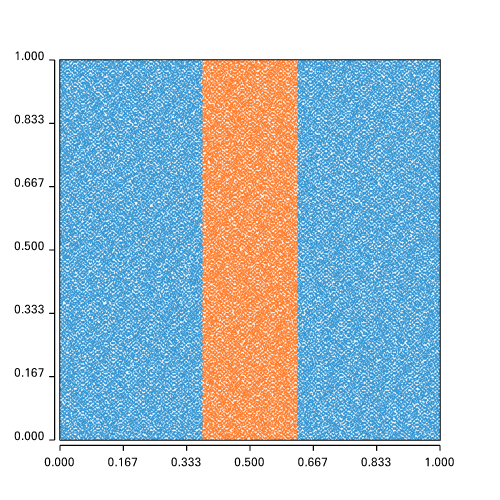

In [9]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")


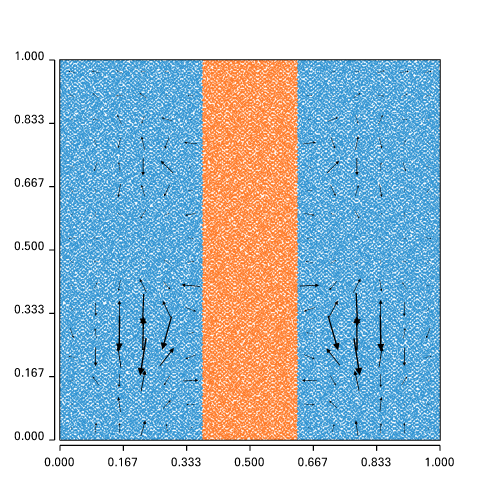

In [10]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

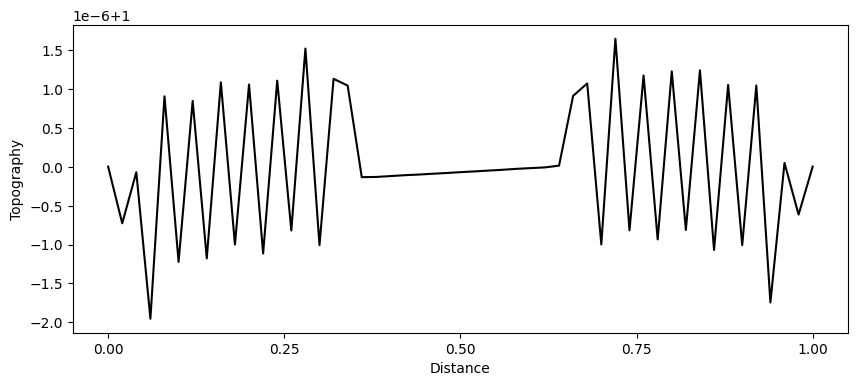

In [11]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [12]:
Model.

SyntaxError: invalid syntax (1342638040.py, line 1)

In [ ]:
1-1*1*1/50/2/2

In [ ]:
0.95*0.25+0.75*1

In [ ]:
coords[:,1].mean()

In [ ]:
1/0.95*0.25+0.75

In [ ]:
1/0.95

In [ ]:
Model.velocityField.evaluate(Model.bottom_wall)

In [ ]:
Model.velocityField.evaluate(Model.top_wall)

In [ ]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")